Coronal hole in-situ timeseries
===

In [1]:
from datetime import datetime, timedelta

import astropy.units as u
import astropy.constants as const
from sunpy.time import TimeRange
from sunpy.timeseries import GenericTimeSeries
from heliopy.data import psp, util
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatch
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd

import helpers
from helpers import figwidth, figdir

Set perihelion 1 dates
----

In [2]:
starttime = datetime(2018, 11, 1)
endtime = datetime(2018, 11, 24)

Get the data
---

Magnetic field

In [3]:
mag = psp.fields_mag_rtn_1min(starttime, endtime)

Plasma
(n.b. load this in daily chunks and downsample to prevent memory explosion)

In [4]:
sweap_data = []
for day in TimeRange(starttime, endtime).get_dates():
    day = day.to_datetime()
    print(day)
    sweap = psp.sweap_spc_l3(day, day + timedelta(days=1) - timedelta(microseconds=1))
    keep = sweap.data['general_flag'] == 0
    sweap.data = sweap.data[keep]
    
    sweap.data = sweap.data.resample('1T').mean()
    sweap.data.index += timedelta(seconds=30)
    sweap_data.append(sweap.data)
    
sweap_data = pd.concat(sweap_data)
sweap.data = sweap_data

2018-11-01 00:00:00


100.0% 48758784 / 48753276


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-02 00:00:00


100.0% 93609984 / 93606932


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-03 00:00:00


100.0% 58703872 / 58701944


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-04 00:00:00


100.0% 31440896 / 31438341


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-05 00:00:00


100.0% 20635648 / 20631986


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-06 00:00:00


100.0% 22519808 / 22518628


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-07 00:00:00


100.0% 22740992 / 22736221


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-08 00:00:00


100.0% 23035904 / 23032743


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-09 00:00:00


100.0% 23068672 / 23067348


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-10 00:00:00


100.0% 23183360 / 23181256


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-11 00:00:00


100.0% 4292608 / 4288481


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-12 00:00:00


100.0% 966656 / 961168


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-13 00:00:00


100.0% 958464 / 956444


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-14 00:00:00


100.0% 933888 / 930445


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-15 00:00:00


100.0% 933888 / 933026


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-16 00:00:00


100.0% 933888 / 926793


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-17 00:00:00


100.0% 835584 / 834719


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-18 00:00:00


100.0% 3284992 / 3278289


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-19 00:00:00


100.0% 802816 / 795582


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-20 00:00:00


100.0% 835584 / 834152


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-21 00:00:00


100.0% 884736 / 878139


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-22 00:00:00


100.0% 884736 / 883172


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-23 00:00:00


100.0% 884736 / 881627


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


2018-11-24 00:00:00


100.0% 638976 / 631396


/Users/dstansby/miniconda3/envs/pub-env/lib/python3.8/functools.py:875: UserWarning: Discarding nonzero nanoseconds in conversion
  return dispatch(args[0].__class__)(*args, **kw)


Filter data for matching times
----

In [5]:
sweap_idx = sweap.index.intersection(mag.index)
mag_idx = mag.index.intersection(sweap.index)
sweap.data = sweap.data.loc[sweap_idx]
mag.data = mag.data.loc[mag_idx]
print(mag.data.shape)
print(sweap.data.shape)

(32809, 5)
(32809, 130)


Drop bad SWEAP data
---

In [6]:
keep = np.isfinite(sweap.quantity('vp_fit_RTN_0'))
keep = keep & np.isfinite(sweap.quantity('np_moment'))
sweap.data = sweap.data[keep]
mag.data = mag.data[keep]
print(mag.data.shape)
print(sweap.data.shape)

(29292, 5)
(29292, 130)


Calculate derived quantities
---

In [7]:
# Radial distance
r = np.sqrt(sweap.quantity('sc_pos_HCI_0')**2 +
            sweap.quantity('sc_pos_HCI_1')**2 +
            sweap.quantity('sc_pos_HCI_2')**2)
r = r.to(u.au)
sweap = sweap.add_column('r', r)

# Mass flux
mass_flux = sweap.quantity('np_moment') * sweap.quantity('vp_moment_RTN_0') * r**2
mass_flux = mass_flux.to(u.s**-1)
sweap = sweap.add_column('mass_flux', mass_flux)

# Radial velocity
vr = sweap.quantity('vp_fit_RTN_0')
sweap = sweap.add_column('vr', vr)

# Magnetic field magnitude
modB = np.sqrt(mag.quantity('psp_fld_l2_mag_RTN_1min_0')**2 + 
             mag.quantity('psp_fld_l2_mag_RTN_1min_1')**2 +
             mag.quantity('psp_fld_l2_mag_RTN_1min_2')**2)
mag = mag.add_column('|B|', modB)

# Alfvén speed
vA = mag.quantity('|B|') / np.sqrt(const.mu0 * const.m_p * sweap.quantity('np_moment'))
vA = vA.to(u.km / u.s)
sweap = sweap.add_column('va', vA)

# Distance normalised magnetic field magnitude
Bflux = (mag.quantity('|B|') * sweap.quantity('r')**2 / const.R_sun**2).to(u.G)
mag = mag.add_column('Bflux', Bflux)

Calculate cross helicities
---

In [8]:
sigmac_data = sweap.data[[]].copy()
sigmac_data['vp_x'] = sweap.data['vp_moment_RTN_0']
sigmac_data['vp_y'] = sweap.data['vp_moment_RTN_1']
sigmac_data['vp_z'] = sweap.data['vp_moment_RTN_2']

sigmac_data['va_x'] = mag.data['psp_fld_l2_mag_RTN_1min_0'] * sweap.quantity('va') / mag.quantity('|B|')
sigmac_data['va_y'] = mag.data['psp_fld_l2_mag_RTN_1min_1'] * sweap.quantity('va') / mag.quantity('|B|')
sigmac_data['va_z'] = mag.data['psp_fld_l2_mag_RTN_1min_2'] * sweap.quantity('va') / mag.quantity('|B|')

sigmac, sigmac_upsamp = helpers.create_sigma_cs(sigmac_data, '20T', 3)

Load electron data
---

In [9]:
electrons = np.load('data/strahl_parallel_temperature_E12.npy', allow_pickle=True)
for e in electrons.flat:
    electrons = e
    pass

electrons = pd.DataFrame(electrons['Ts'], columns=['Te'], index=electrons['Epoch'])
electrons = electrons.dropna()
electrons = electrons.sort_index()
electrons = electrons[electrons.index > starttime]
electrons = electrons[electrons.index < endtime]

# electrons = electrons.resample('5T').mean()
print(electrons.shape)
ev_to_K = float(1 * u.eV / const.k_B / u.K )
electrons['Te'] = electrons['Te'] * ev_to_K / 1e6
electrons = GenericTimeSeries(electrons, units={'Te': u.MK})

(33931, 1)


Setup in-situ intervals
---

In [13]:
import importlib
importlib.reload(helpers)
from helpers import streams

In [14]:
def downsamp_plot(ax, data, var, period='2H', label=''):
    downsamp = data.to_dataframe()[var]
    downsamp = downsamp.resample(period).median()
    ax.step(downsamp.index, downsamp, color='k', where='post', lw=1, label=label)
    ax.plot(data.index, data.quantity(var), alpha=0.2, color='tab:blue', lw=1, rasterized=True)

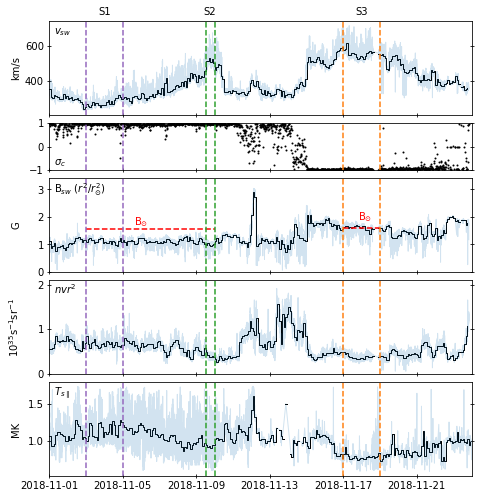

In [19]:
fig, axs = plt.subplots(nrows=5, sharex=True, figsize=(2 * figwidth, 7), gridspec_kw={'height_ratios': [1, 0.5, 1, 1, 1]})
ax = axs[0]
downsamp_plot(ax, sweap, 'vr')

ax.set_ylabel('km/s')
ax.text(0.01, 0.87, '$v_{sw}$', transform=ax.transAxes)

ax = axs[1]
ax.scatter(sigmac.index, sigmac['correl'], s=1, color='k')
ax.set_ylim(-1, 1)
ax.text(0.01, 0.1, '$\sigma_{c}$', transform=ax.transAxes)

# Magnetic field
ax = axs[2]
downsamp_plot(ax, mag, 'Bflux')
ax.plot([datetime(2018, 11, 3), datetime(2018, 11, 10)], [1.54, 1.54], color='red', linestyle='--')
ax.plot([datetime(2018, 11, 17), datetime(2018, 11, 19)], [1.61, 1.61], color='red', linestyle='--')
ax.set_ylim(0, 3.4)

ax.set_ylabel('G')
ax.text(0.01, 0.85, 'B$_{sw}$ $(r^{2} / r^{2}_{\odot})$', transform=ax.transAxes)
ax.text(0.2, 0.5, 'B$_{\odot}$', transform=ax.transAxes, color='red')
ax.text(0.73, 0.55, 'B$_{\odot}$', transform=ax.transAxes, color='red')

ax = axs[3]
sweap.data = sweap.data / 1e35
downsamp_plot(ax, sweap, 'mass_flux')
sweap.data = sweap.data * 1e35
ax.set_ylim(0, 2.1)

ax.set_ylabel('10$^{35}$s$^{-1}$sr$^{-1}$')
ax.text(0.01, 0.85, '$nvr^{2}$', transform=ax.transAxes)

# Electrons
ax = axs[4]
downsamp_plot(ax, electrons, 'Te')

for stream in streams:
    for ax in axs:
        ax.axvline(stream.start, color=stream.color, ls='--')
        ax.axvline(stream.end, color=stream.color, ls='--')
        # ax.axvspan(stream.start, stream.end, alpha=0.2, color=stream.color)
    axs[0].text(stream.start + (stream.end - stream.start) / 2, 780,
                stream.name, ha='center')   
ax.set_xlim(starttime, endtime)
ax.set_ylabel('MK')
ax.text(0.01, 0.85, '$T_{s\parallel}$', transform=ax.transAxes)

for ax in axs:
    ax.tick_params(which='both', right=True, direction='inout')
fig.align_ylabels()
fig.tight_layout()
fig.subplots_adjust(hspace=0.1)
fig.savefig(f'{figdir}/p1_tseries.pdf', bbox_inches='tight', dpi=300)
# fig.savefig('p1_tseries_full.png', dpi=300, bbox_inches='tight')

Stream histograms
----

In [12]:
mag = mag.add_column('B (corona)', (mag.quantity('|B|') * sweap.quantity('r')**2 / const.R_sun**2).to(u.G))
mag = mag.add_column('Mass flux', sweap.quantity('mass_flux'))
mag = mag.add_column('Mass flux coronal', mag.quantity('Mass flux') / mag.quantity('B (corona)'))

Load AR data
---

In [30]:
ar = {}
for i in [1, 2]:
    ar[i] = {}
    ar[i]['mflux'] = np.load(f'data/mflux_corona_{i}.npy')
    ar[i]['Te'] = np.load(f'data/outflow_temps_{i}.npy')

In [31]:
from scipy.stats import gaussian_kde
def normed_hist(ax, data, log=False, **kwargs):
    if log:
        data = np.log(data)
        
    kwargs['lw'] = 1
    kde = gaussian_kde(data)
    points = np.linspace(data.min(), data.max(), 1000)
    kde = kde.evaluate(points)
    
    if log:
        points = np.exp(points)
    
    orientation = kwargs.pop('orientation', None)
    if orientation == 'horizontal':
        ax.plot(kde, points, **kwargs)
    else:
        ax.plot(points, kde, **kwargs)

1.8556662
2.280450882937242


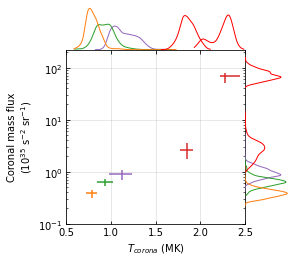

In [33]:
gs = gridspec.GridSpec(2, 2, wspace=0, hspace=0,
                       width_ratios=[4, 1],
                       height_ratios=[1, 4])

fig = plt.figure(figsize=(4, 4))
# Mass flux joint plot
joint_ax = fig.add_subplot(gs[1, 0])
mflux_ax = fig.add_subplot(gs[1, 1], sharey=joint_ax)
temp_ax = fig.add_subplot(gs[0, 0], sharex=joint_ax)

# Plot in-situ data
for stream in streams:
    idxs = np.where((mag.index > stream.start) & (mag.index < stream.end))
    mflux = (mag.quantity('Mass flux coronal') * stream.b)
    mflux = mflux.to_value(1 / u.s)[idxs] / 1e35
    
    idxs = (electrons.index > stream.start) & (electrons.index < stream.end)
    Te = electrons.quantity('Te')[idxs].to_value(u.MK)
    Te = Te[np.isfinite(Te)]
    
    # Joint scatter
    joint_ax.errorbar(np.median(Te), np.median(mflux),
                yerr=[[np.percentile(mflux, 80) - np.percentile(mflux, 50)],
                      [np.percentile(mflux, 50) - np.percentile(mflux, 20)]],
                xerr=[[np.percentile(Te, 80) - np.percentile(Te, 50)],
                      [np.percentile(Te, 50) - np.percentile(Te, 20)]],
                color=stream.color)
    # Mass flux
    normed_hist(mflux_ax, mflux, log=True, color=stream.color, orientation='horizontal')
    # Electron temp
    normed_hist(temp_ax, Te, color=stream.color)

# Plot active region data
for ari in ar:
    Te = ar[ari]['Te']
    print(np.median(Te))
    mflux = ar[ari]['mflux']
    Te = Te[np.isfinite(Te)]
    mflux = mflux[np.isfinite(mflux)]
    joint_ax.errorbar(np.median(Te), np.median(mflux),
                yerr=[[np.percentile(mflux, 80) - np.percentile(mflux, 50)],
                      [np.percentile(mflux, 50) - np.percentile(mflux, 20)]],
                xerr=[[np.percentile(Te, 80) - np.percentile(Te, 50)],
                      [np.percentile(Te, 50) - np.percentile(Te, 20)]],
                color='tab:red')
    # Mass flux
    normed_hist(mflux_ax, mflux, log=True, color='red', orientation='horizontal')
    # Electron temp
    normed_hist(temp_ax, Te, color='red')
    
    
joint_ax.set_yscale('log')
joint_ax.set_xlabel('$T_{corona}$ (MK)')
joint_ax.set_ylabel(r'Coronal mass flux' + '\n($10^{35}$ s$^{-2}$ sr$^{-1}$)')


mflux_ax.set_xlim(*mflux_ax.get_xlim())
for ax in [mflux_ax, temp_ax]:
    ax.axis('off')

temp_ax.set_ylim(bottom=0)
mflux_ax.set_xlim(left=0)

joint_ax.grid(lw=1, alpha=0.3)
joint_ax.set_ylim(bottom=0.1)
joint_ax.set_xlim(left=0.5, right=2.5)
joint_ax.tick_params(which='both', right=True, top=True, direction='in')

# fig.savefig('ch_hists.pdf', bbox_inches='tight')
fig.savefig(f'{figdir}/insitu_hists.pdf', bbox_inches='tight')